# Import dependencies

In [520]:
# import pandas
import pandas as pd

# import sql alchemy
from sqlalchemy import create_engine

# import pymysql
import pymysql
pymysql.install_as_MySQLdb()

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [521]:
# import and establish Base for which classes will be constructed
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [522]:
# import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float

# Get csv into dataframe

In [523]:
# store filepath in variable
tickets_311 = "311_Call_Center_Service_Requests.csv"

In [524]:
# get data into a dataframe
tickets_311_df = pd.read_csv(tickets_311, encoding="ISO-8859-1")

C:\Users\apron\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [525]:
# test df
tickets_311_df.head()


,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
0,2014123049,SYS,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,09/23/2014,10:23 AM,9,2014,RESOL,Y,06/25/2018,6.0,2018.0,"1,371",4717 NE 45TH TER,"4717 NE 45TH TER\n64117\n(39.175993, -94.523942)",64117.0,Winnwood,Clay,1.0,Shoal Creek,76031,39.175993,-94.523942,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
1,2016002855,PHONE,NHS,NHS-Dangerous Buildings-,Prop/Build/Construct-Dangerous Building-On list,Property / Buildings / Construction,Dangerous Building,Standard,01/11/2016,08:42 AM,1,2016,RESOL,Y,02/09/2018,2.0,2018.0,760,5435 E 28TH TER,"5435 E 28TH TER\n64128\n(39.072903, -94.518698)",64128.0,South Blue Valley,Jackson,3.0,East,21655,39.072903,-94.518698,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
2,2015094706,WEB,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,08/08/2015,06:54 AM,8,2015,RESOL,Y,05/03/2018,5.0,2018.0,999,7001 E 16TH TER,"7001 E 16TH TER\n64126\n(39.091047, -94.500874)",64126.0,East Blue Valley,Jackson,3.0,East,7330,39.091047,-94.500874,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
3,2010071747,PHONE,NHS,NHS-Solid Waste-,Trash Recycling Missed by Contractor,Trash,Recycle,Contractor,02/23/2010,07:39 AM,2,2010,RESOL,N,02/23/2010,2.0,2010.0,0,13001 E 59TH TER,"13001 E 59TH TER\n64133\n(39.013549, -94.428135)",64133.0,Blue Vue Hills,Jackson,5.0,East,64380,39.013549,-94.428135,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
4,2014080650,PHONE,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,06/24/2014,12:11 PM,6,2014,RESOL,Y,06/27/2018,6.0,2018.0,"1,464",3002 LISTER AVE,"3002 LISTER AVE\n64128\n(39.070634, -94.528934)",64128.0,Knoches Park,Jackson,3.0,East,22793,39.070634,-94.528934,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN


In [526]:
status = tickets_311_df["STATUS"]
print("Using Loc: " + status)

0          Using Loc: RESOL
1          Using Loc: RESOL
2          Using Loc: RESOL
3          Using Loc: RESOL
4          Using Loc: RESOL
5          Using Loc: RESOL
6          Using Loc: RESOL
7          Using Loc: RESOL
8          Using Loc: RESOL
9           Using Loc: OPEN
10         Using Loc: RESOL
11          Using Loc: OPEN
12         Using Loc: RESOL
13         Using Loc: RESOL
14         Using Loc: RESOL
15          Using Loc: OPEN
16         Using Loc: RESOL
17          Using Loc: OPEN
18          Using Loc: OPEN
19         Using Loc: RESOL
20         Using Loc: RESOL
21         Using Loc: RESOL
22         Using Loc: RESOL
23         Using Loc: RESOL
24          Using Loc: OPEN
25          Using Loc: OPEN
26         Using Loc: RESOL
27         Using Loc: RESOL
28         Using Loc: RESOL
29         Using Loc: RESOL
30         Using Loc: RESOL
31         Using Loc: RESOL
32         Using Loc: RESOL
33         Using Loc: RESOL
34         Using Loc: RESOL
35         Using Loc

In [527]:
resolved_tix_df = tickets_311_df[tickets_311_df['STATUS'] == "RESOL"]

In [528]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [529]:
resolved_tix_df

,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
0,2014123049,SYS,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,09/23/2014,10:23 AM,9,2014,RESOL,Y,06/25/2018,6.0,2018.0,"1,371",4717 NE 45TH TER,"4717 NE 45TH TER\n64117\n(39.175993, -94.523942)",64117.0,Winnwood,Clay,1.0,Shoal Creek,76031,39.175993,-94.523942,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
1,2016002855,PHONE,NHS,NHS-Dangerous Buildings-,Prop/Build/Construct-Dangerous Building-On list,Property / Buildings / Construction,Dangerous Building,Standard,01/11/2016,08:42 AM,1,2016,RESOL,Y,02/09/2018,2.0,2018.0,760,5435 E 28TH TER,"5435 E 28TH TER\n64128\n(39.072903, -94.518698)",64128.0,South Blue Valley,Jackson,3.0,East,21655,39.072903,-94.518698,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
2,2015094706,WEB,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,08/08/2015,06:54 AM,8,2015,RESOL,Y,05/03/2018,5.0,2018.0,999,7001 E 16TH TER,"7001 E 16TH TER\n64126\n(39.091047, -94.500874)",64126.0,East Blue Valley,Jackson,3.0,East,7330,39.091047,-94.500874,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
3,2010071747,PHONE,NHS,NHS-Solid Waste-,Trash Recycling Missed by Contractor,Trash,Recycle,Contractor,02/23/2010,07:39 AM,2,2010,RESOL,N,02/23/2010,2.0,2010.0,0,13001 E 59TH TER,"13001 E 59TH TER\n64133\n(39.013549, -94.428135)",64133.0,Blue Vue Hills,Jackson,5.0,East,64380,39.013549,-94.428135,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
4,2014080650,PHONE,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,06/24/2014,12:11 PM,6,2014,RESOL,Y,06/27/2018,6.0,2018.0,"1,464",3002 LISTER AVE,"3002 LISTER AVE\n64128\n(39.070634, -94.528934)",64128.0,Knoches Park,Jackson,3.0,East,22793,39.070634,-94.528934,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
5,2017017888,PHONE,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Other Property Issue,02/16/2017,07:30 AM,2,2017,RESOL,Y,06/07/2018,6.0,2018.0,476,2508 E 69TH ST,"2508 E 69TH ST\n64132\n(39.001971, -94.557283)",64132.0,Blenheim Square Research Hospital,Jackson,5.0,Metro,113882,39.001971,-94.557283,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
6,2016123146,PHONE,City Planning and Development,City Planning and Development-Dev Comp-Zoning,Prop/Build/Construct - Land Use / Zoning - Mis...,Property / Buildings / Construction,Land Use / Zoning Issue,Miscellaneous Zoning,10/03/2016,04:10 PM,10,2016,RESOL,N,07/25/2018,7.0,2018.0,660,7230 WORNALL RD,"7230 WORNALL RD\n64114\n(38.9965, -94.594358)",64114.0,Ward Parkway,Jackson,6.0,Metro,110649,38.996500,-94.594358,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
7,2016133215,WEB,NHS,NHS-Neighborhood Preservation-,Property Violations,Vehicles / Parking,Disabled/Unlicensed on Private Property,Other Private Property,10/25/2016,09:04 PM,10,2016,RESOL,Y,05/03/2018,5.0,2018.0,555,1600 BRISTOL AVE,"1600 BRISTOL AVE\n64126\n(39.092275, -94.500291)",64126.0,East Blue Valley,Jackson,3.0,East,7290,39.092275,-94.500291,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
8,2017009064,EMAIL,NHS,NHS-Neighborhood Preservation-,Property Violations,Vehicles / Parking,Parked on Unapproved Surface,Car Private Property,01/24/2017,01:20 PM,1,2017,RESOL,Y,05/03/2018,5.0,2018.0,464,12206 E 59TH ST,"12206 E 59TH ST\n64133\n(39.014959, -94.437536)",64133.0,Fairway Hills,Jackson,5.0,East,63692,39.014959,-94.437536,http://webfusion.kcmo.org/coldfusionapps/Acti

In [530]:
reduced_df = resolved_tix_df[["LATITUDE","LONGITUDE","DAYS TO CLOSE","CREATION DATE"]].reset_index(drop=True)
reduced_df

,LATITUDE,LONGITUDE,DAYS TO CLOSE,CREATION DATE
0,39.175993,-94.523942,"1,371",09/23/2014
1,39.072903,-94.518698,760,01/11/2016
2,39.091047,-94.500874,999,08/08/2015
3,39.013549,-94.428135,0,02/23/2010
4,39.070634,-94.528934,"1,464",06/24/2014
5,39.001971,-94.557283,476,02/16/2017
6,38.996500,-94.594358,660,10/03/2016
7,39.092275,-94.500291,555,10/25/2016
8,39.014959,-94.437536,464,01/24/2017
9,39.092613,-94.527612,350,05/18/2017


In [531]:
# print(len(reduced_df["LATITUDE"].values))
# print(len(reduced_df["LONGITUDE"].values))
# long_array = []
# print(type(long_array))
# i = 0

# for x in reduced_df["LATITUDE"].values:
# #     long_array[i] = [reduced_df["LATITUDE"][i], reduced_df["LONGITUDE"][i]]

#     long_array.append([reduced_df["LATITUDE"][i], reduced_df["LONGITUDE"][i]])
#     i += 1
# long_array

In [532]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [533]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")
# print(f"{long_array[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


In [534]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [535]:
reduced_df

,LATITUDE,LONGITUDE,DAYS TO CLOSE,CREATION DATE
0,39.175993,-94.523942,"1,371",09/23/2014
1,39.072903,-94.518698,760,01/11/2016
2,39.091047,-94.500874,999,08/08/2015
3,39.013549,-94.428135,0,02/23/2010
4,39.070634,-94.528934,"1,464",06/24/2014
5,39.001971,-94.557283,476,02/16/2017
6,38.996500,-94.594358,660,10/03/2016
7,39.092275,-94.500291,555,10/25/2016
8,39.014959,-94.437536,464,01/24/2017
9,39.092613,-94.527612,350,05/18/2017


In [545]:
df = pd.DataFrame()
final_df = pd.DataFrame()
df["DAYS TO CLOSE"] = reduced_df["DAYS TO CLOSE"].replace(',','', regex=True).astype(int)
bins = [-1, 15, 31, 90, 365, 9999999999]
df['binned'] = pd.cut(df['DAYS TO CLOSE'], bins, labels=[1,2,3,4,5])
full_df = reduced_df
full_df["DAYS TO CLOSE"] = df["DAYS TO CLOSE"]
full_df["BINNED"]= df["binned"]
full_df

,LATITUDE,LONGITUDE,DAYS TO CLOSE,CREATION DATE,BINNED
0,39.175993,-94.523942,1371,09/23/2014,5
1,39.072903,-94.518698,760,01/11/2016,5
2,39.091047,-94.500874,999,08/08/2015,5
3,39.013549,-94.428135,0,02/23/2010,1
4,39.070634,-94.528934,1464,06/24/2014,5
5,39.001971,-94.557283,476,02/16/2017,5
6,38.996500,-94.594358,660,10/03/2016,5
7,39.092275,-94.500291,555,10/25/2016,5
8,39.014959,-94.437536,464,01/24/2017,5
9,39.092613,-94.527612,350,05/18/2017,4


In [546]:
target = full_df["BINNED"]
target_names = ["Good","OK","Not Good","Bad", "Shameful"]

In [547]:
data = full_df.drop(["BINNED","CREATION DATE","DAYS TO CLOSE"], axis=1)
feature_names = data.columns
data.head()

,LATITUDE,LONGITUDE
0,39.175993,-94.523942
1,39.072903,-94.518698
2,39.091047,-94.500874
3,39.013549,-94.428135
4,39.070634,-94.528934


In [548]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.head(10000), target.head(10000), random_state=42)

k: 1, Train/Test Score: 0.975/0.661
k: 3, Train/Test Score: 0.809/0.764
k: 5, Train/Test Score: 0.790/0.781
k: 7, Train/Test Score: 0.785/0.787
k: 9, Train/Test Score: 0.784/0.788
k: 11, Train/Test Score: 0.782/0.788
k: 13, Train/Test Score: 0.783/0.788
k: 15, Train/Test Score: 0.782/0.788
k: 17, Train/Test Score: 0.782/0.790
k: 19, Train/Test Score: 0.782/0.791


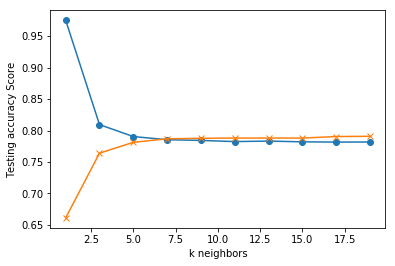

In [549]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [550]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=10 Test Acc: %.3f' % knn.score(X_test, y_test))

k=10 Test Acc: 0.787


In [551]:
X_train.head()

,LATITUDE,LONGITUDE
4901,39.113040,-94.527773
4375,39.159909,-94.547406
6698,39.066356,-94.521116
9805,39.046170,-94.532952
1101,39.083087,-94.521736


In [552]:
 predictions = knn.predict(X_test)
print(f"First 10 Predictions:   {predictions[:100]}")
print(f"First 10 Actual labels: {y_test[:100].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 4, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 2, 1]


In [553]:
X_test.head()

,LATITUDE,LONGITUDE
6252,39.285656,-94.550821
4684,38.996850,-94.594339
1731,39.104725,-94.526321
4742,39.099622,-94.580219
4521,38.889742,-94.593935


In [554]:
a=knn.predict([[39.18,-94.509]])

In [555]:
print(a)

[1]


In [559]:
X_test

,LATITUDE,LONGITUDE
6252,39.285656,-94.550821
4684,38.996850,-94.594339
1731,39.104725,-94.526321
4742,39.099622,-94.580219
4521,38.889742,-94.593935
6340,38.929406,-94.579707
576,38.910413,-94.588447
5202,39.013391,-94.583471
6363,39.202259,-94.527144
439,38.990400,-94.493505


In [571]:
export_df = X_test
export_df = export_df.reset_index(drop=True)
export_df["Prediction"] =  predictions
export_df["Actual"] = y_test.reset_index(drop=True)

In [573]:
export_df.to_excel("NotebookOutput.xls")